<center> <h1> Proyecto de Programación </h1></center>

En este pequeño proyecto se pretende realizar un análisis sobre el estudio multidimensional de la pobreza realizado por el Consejo Nacional de Población (CONAPO) del gobierno mexicano en el 2020, teniendo como punto de enfoque para el análisis el índice de marginación

In [1]:
# Importando librerías

import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import xlrd

La tabla nos muestra indicadores sociodemográficos e índice de marginación por municipios, tales como:
* Porcentaje de población analfabeta de 15 años o más;
* Porcentaje de población que vive en localidades menores a 5 000 habitantes;
* Grado de marginación;
* Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado;
* Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica;
* Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada;
* Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra;

entre otros


In [2]:
# Cargando datos y visualizando los 10 primeros

imm_2020_xls = 'IMM_2020.xls'
df_imm_2020 = pd.read_excel(imm_2020_xls, sheet_name='IMM_2020', engine='xlrd')
df_imm_2020.head(10)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
5,1,Aguascalientes,1006,Pabellón de Arteaga,47646,2.732339,25.724280,0.541338,0.425487,1.044760,0.705635,19.075954,32.764555,64.335011,58.624768,Muy bajo,0.917982
6,1,Aguascalientes,1007,Rincón de Romos,57369,3.445917,27.094343,0.965870,0.501341,1.027223,1.302663,20.975502,44.285241,76.643972,57.646671,Muy bajo,0.902667
7,1,Aguascalientes,1008,San José de Gracia,9552,2.439773,28.419940,2.107139,0.922529,1.708775,0.859629,21.572750,41.300251,75.410936,57.527531,Muy bajo,0.900801
8,1,Aguascalientes,1009,Tepezalá,22485,4.235219,35.086278,1.385042,0.585292,1.085694,1.429720,22.985739,76.762286,76.943557,56.604314,Muy bajo,0.886345
9,1,Aguascalientes,1010,El Llano,20853,3.898421,34.757713,2.321131,1.030523,1.781333,1.452547,21.816786,69.754951,76.336092,56.555794,Muy bajo,0.885585


In [3]:
# Diccionario de los indicadores sociodemográficos e índice de marginación por municipios

df_dic_2020 = pd.read_excel(imm_2020_xls, sheet_name='Diccionario', engine='xlrd')
df_dic_2020

,"Indicadores sociodemográficos e índice de marginación por municipio, 2020",Unnamed: 1
0,NaN,NaN
1,Variable,Descripción
2,CVE_ENT,Clave de entidad federativa
3,NOM_ENT,Nombre de entidad federativa
4,CVE_MUN,Clave del municipio
5,NOM_MUN,Nombre del municipio
6,POB_TOT,Población total
7,ANALF,Porcentaje de población analfabeta de 15 años ...
8,SBASC,Porcentaje de población de 15 años o más sin e...
9,OVSDE,Porcentaje de ocupantes en viviendas particula...


La siguiente tabla muestra información general referente a los indicadores para un total de 2469 municipios

In [4]:
# Descripción del dataframe
df_imm_2020.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


En la tabla, así como en el gráfico siguiente se puede apreciar el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Siendo <i> <b>Aguascalientes </b></i> la entidad federativa con el mayor porcentaje de municipios por estado con índice de marginación "muy bajo". Por su parte <i> <b>Guerrero</b> </i> es la entidad federativa con el mayor porcentaje de municipios por estado con índice de marginación "muy alto"

In [5]:
# Tabla del porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto"

pmm = df_imm_2020.groupby(['NOM_ENT', 'GM_2020'])[['GM_2020']].count().unstack('GM_2020').fillna(0).apply(lambda x: x / sum(x) * 100, axis=1)
pmm

GM_2020                                   \
GM_2020                               Alto       Bajo      Medio   Muy alto   
NOM_ENT                                                                       
Aguascalientes                    0.000000   0.000000   0.000000   0.000000   
Baja California                   0.000000   0.000000  16.666667   0.000000   
Baja California Sur               0.000000   0.000000   0.000000   0.000000   
Campeche                         16.666667  50.000000  16.666667   0.000000   
Chiapas                          53.225806   5.645161  24.193548  16.129032   
Chihuahua                         2.985075  28.358209   5.970149  16.417910   
Ciudad de México                  0.000000   0.000000   0.000000   0.000000   
Coahuila de Zaragoza              0.000000  21.052632   0.000000   0.000000   
Colima                            0.000000  20.000000   0.000000   0.000000   
Durango                          12.820513  25.641026  10.256410   5.128205   
Guanajuato                        6.521739  39.130435  13.043478   0.000000   
Guerrero                         34.567901   7.407407  14.814815  41.975309   
Hidalgo                          14.285714  26.190476  23.809524   2.380952   
Jalisco                           2.400000  27.200000   6.400000   1.600000   
Michoacán de Ocampo              11.504425  49.557522  21.238938   0.884956   
Morelos                           0.000000  52.777778  13.888889   0.000000   
México                            9.600000  20.800000  11.200000   0.000000   
Nayarit                           0.000000  25.000000   5.000000  15.000000   
Nuevo León                        5.882353  15.686275   5.882353   0.000000   
Oaxaca                           41.052632  10.701754  26.491228  16.140351   
Puebla                           34.562212  19.815668  30.414747   5.069124   
Querétaro                        16.666667  22.222222  27.777778   0.000000   
Quintana Roo                      9.090909   9.090909  27.272727   0.000000   
San Luis Potosí                  27.586207  22.413793  32.758621   3.448276   
Sinaloa                           5.555556  44.444444  11.111111   0.000000   
Sonora                            1.388889  23.611111   5.555556   0.000000   
Tabasco                           0.000000  41.176471  35.294118   0.000000   
Tamaulipas                        4.651163  39.534884  16.279070   4.651163   
Tlaxcala                          0.000000  21.666667   3.333333   0.000000   
Veracruz de Ignacio de la Llave  29.716981  22.641509  25.943396   9.905660   
Yucatán                          36.792453  22.641509  33.018868   0.943396   
Zacatecas                         3.448276  48.275862   8.620690   0.000000   

                                             
GM_2020                            Muy bajo  
NOM_ENT                                      
Aguascalientes                   100.000000  
Baja California                   83.333333  
Baja California Sur              100.000000  
Campeche                          16.666667  
Chiapas                            0.806452  
Chihuahua                         46.268657  
Ciudad de México                 100.000000  
Coahuila de Zaragoza              78.947368  
Colima                            80.000000  
Durango                           46.153846  
Guanajuato                        41.304348  
Guerrero                           1.234568  
Hidalgo                           33.333333  
Jalisco                           62.400000  
Michoacán de Ocampo               16.814159  
Morelos                           33.333333  
México                            58.400000  
Nayarit                           55.000000  
Nuevo León                        72.549020  
Oaxaca                             5.614035  
Puebla                            10.138249  
Querétaro                         33.333333  
Quintana Roo                      54.545455  
San Luis Potosí                   13.793103  
Sinaloa                    

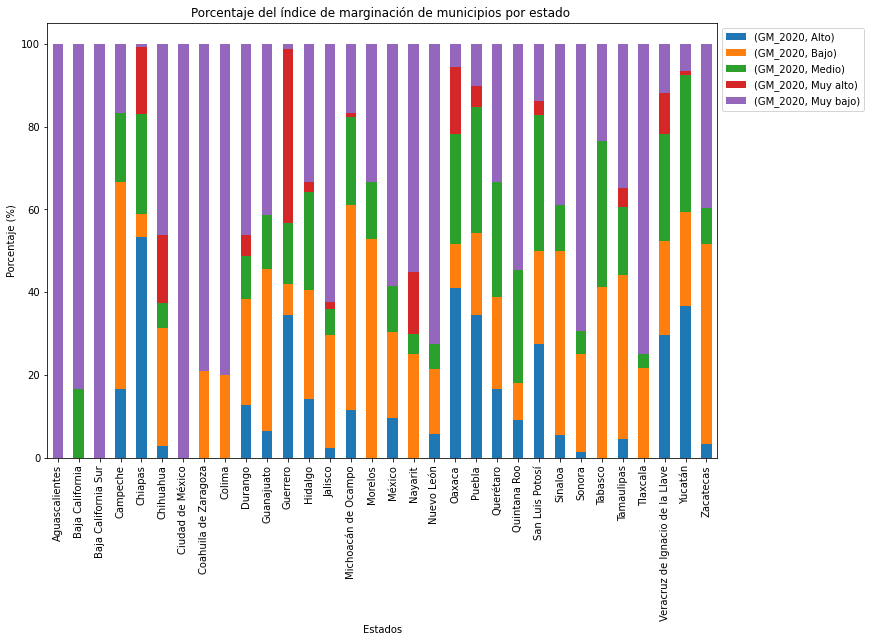

In [6]:
# Gráfica del porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto"

fig, ax = plt.subplots()
pmm.plot(kind='bar', stacked=True, figsize=(12, 8), ax=ax)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel('Estados')
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Porcentaje del índice de marginación de municipios por estado ')

plt.savefig('pmm.png', facecolor='w', bbox_inches='tight', dpi=200)

En la tabla, así como en el gráfico siguiente se puede apreciar el porcentaje de la población respecto a la población total de cada estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Siendo <i> <b>Aguascalientes </b></i> el estado con el mayor porcentaje de la población respecto a la población total de cada estado con índice de marginación "muy bajo". Por su parte <i> <b>Guerrero</b> </i> es el estado con el mayor porcentaje de la población respecto a la población total de cada estado con índice de marginación "muy alto"

In [7]:
# Tabla del porcentaje de la población respecto a la población total de cada estado con índices de marginación "muy bajo", "bajo", "medio", "alto"

pmp = df_imm_2020.groupby(['NOM_ENT', 'GM_2020'])[['POB_TOT']].sum().unstack('GM_2020').fillna(0).apply(lambda x: x / sum(x) * 100, axis=1)
pmp

POB_TOT                                   \
GM_2020                               Alto       Bajo      Medio   Muy alto   
NOM_ENT                                                                       
Aguascalientes                    0.000000   0.000000   0.000000   0.000000   
Baja California                   0.000000   0.000000   3.119325   0.000000   
Baja California Sur               0.000000   0.000000   0.000000   0.000000   
Campeche                          8.469424  27.574451   5.474475   0.000000   
Chiapas                          31.036894  18.005014  21.239187  18.821255   
Chihuahua                         0.697726   2.734730   0.536924   4.892154   
Ciudad de México                  0.000000   0.000000   0.000000   0.000000   
Coahuila de Zaragoza              0.000000   1.612955   0.000000   0.000000   
Colima                            0.000000   4.545995   0.000000   0.000000   
Durango                           4.097073   5.978719   2.084522   4.086050   
Guanajuato                        0.590991  20.969788   5.181765   0.000000   
Guerrero                         23.900093  36.264141  12.839521  23.437583   
Hidalgo                           7.280590  18.433776  15.032790   1.166424   
Jalisco                           0.280960   5.160304   0.687613   0.348892   
Michoacán de Ocampo               4.058607  35.044577  11.244690   0.519621   
Morelos                           0.000000  26.545711   5.022470   0.000000   
México                            3.534729   7.950928   3.040856   0.000000   
Nayarit                           0.000000  16.917802   1.950373   5.949139   
Nuevo León                        0.864768   0.340984   1.007392   0.000000   
Oaxaca                           28.254336  17.928762  18.619614  14.351616   
Puebla                           12.101828  19.598808  16.352659   2.018949   
Querétaro                         2.301826   7.448404   8.280250   0.000000   
Quintana Roo                      2.107929   2.514606   8.337796   0.000000   
San Luis Potosí                  10.379998  13.508949  16.073601   2.144455   
Sinaloa                           0.876858  12.092696   3.568088   0.000000   
Sonora                            0.104929   6.895451   1.539235   0.000000   
Tabasco                           0.000000  35.183789  24.741717   0.000000   
Tamaulipas                        0.222437   7.480210   1.899349   0.240041   
Tlaxcala                          0.000000  14.156758   1.054225   0.000000   
Veracruz de Ignacio de la Llave  16.860052  20.814531  16.724115   5.261741   
Yucatán                          11.457074   9.741316  21.943274   0.170839   
Zacatecas                         0.429926  21.386836   6.305505   0.000000   

                                             
GM_2020                            Muy bajo  
NOM_ENT                                      
Aguascalientes                   100.000000  
Baja California                   96.880675  
Baja California Sur              100.000000  
Campeche                          58.481650  
Chiapas                           10.897651  
Chihuahua                         91.138466  
Ciudad de México                 100.000000  
Coahuila de Zaragoza              98.387045  
Colima                            95.454005  
Durango                           83.753635  
Guanajuato                        73.257457  
Guerrero                           3.558662  
Hidalgo                           58.086421  
Jalisco                           93.522230  
Michoacán de Ocampo               49.132505  
Morelos                           68.431819  
México                            85.473486  
Nayarit                           75.182686  
Nuevo León                        97.786857  
Oaxaca                            20.845672  
Puebla                            49.927756  
Querétaro                         81.969519  
Quintana Roo                      87.039669  
San Luis Potosí                   57.892997  
Sinaloa                    

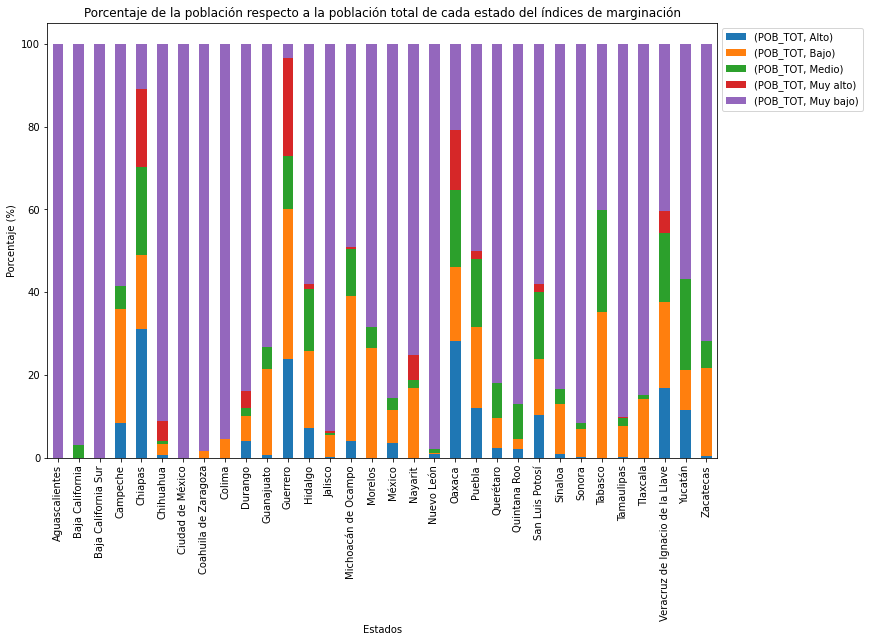

In [8]:
# Gráfica del porcentaje de la población respecto a la población total de cada estado con índices de marginación "muy bajo", "bajo", "medio", "alto"

fig, ax = plt.subplots()
pmp.plot(kind='bar', stacked=True, figsize=(12, 8), ax=ax)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel('Estados')
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Porcentaje de la población respecto a la población total de cada estado del índices de marginación')

plt.savefig('pmp.jpg', facecolor='w', bbox_inches='tight', dpi=200)

De los dos gráficos anteriores, podemos decir que, si bien muestran diferencias en los por cientos, <i> <b>Aguascalientes </b></i> es el estado con el mayor porcentaje, tanto, de la población respecto a la población total de cada estado, como, de municipios por estado, con el índice de marginación "muy bajo". Por su parte <i> <b>Guerrero</b> </i> es el estado con el mayor porcentaje, tanto, de la población respecto a la población total de cada estado, como, de municipios por estado, con el índice de marginación "muy alto"

En el gráfico siguiente se muestra la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.

Text(0, 0.5, 'Porcentaje de analfabetismo en personas mayores de 15 años')

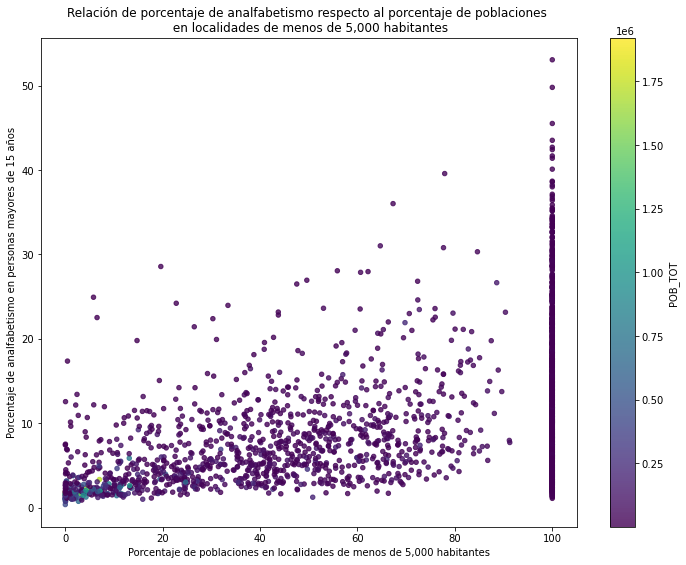

In [20]:
ppa = df_imm_2020[['ANALF', 'PL.5000', 'POB_TOT']].fillna(0)

# Gráfica la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes

fig, ax = plt.subplots()
s = ppa.plot(kind='scatter', x='PL.5000', y='ANALF', figsize=(12, 9), colormap='viridis', alpha=0.8, c='POB_TOT', ax=ax)
ax.set_title('Relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones \n en localidades de menos de 5,000 habitantes')
ax.set_xlabel('Porcentaje de poblaciones en localidades de menos de 5,000 habitantes')
ax.set_ylabel('Porcentaje de analfabetismo en personas mayores de 15 años')

La gráfica anterior muestra que los municipios con mayor porcentaje de población en localidades de menos de 5,000 habitantes tienen mayor porcentaje de analfabetismo en personas mayores de 15 años. Por su parte, los municipios con mayor población (círculos con tonos azul-verde) tienen menor porcentaje de analfabetismo en personas mayores de 15 años.

In [16]:
new_df = df_imm_2020[['CVE_ENT', 'SBASC', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT']]
new_df.head(10)

,CVE_ENT,SBASC,NOM_ENT,CVE_MUN,NOM_MUN,OVSDE,OVSEE,OVSAE,OVPT
0,1,20.367220,Aguascalientes,1001,Aguascalientes,0.104799,0.113169,0.378610,0.591434
1,1,33.906364,Aguascalientes,1002,Asientos,2.650373,0.486448,0.858160,1.352430
2,1,42.482450,Aguascalientes,1003,Calvillo,0.365177,0.516760,0.800978,1.040411
3,1,27.696745,Aguascalientes,1004,Cosío,0.712855,0.577354,0.659833,1.030989
4,1,26.692477,Aguascalientes,1005,Jesús María,0.277034,0.354957,0.860426,1.312652
5,1,25.724280,Aguascalientes,1006,Pabellón de Arteaga,0.541338,0.425487,1.044760,0.705635
6,1,27.094343,Aguascalientes,1007,Rincón de Romos,0.965870,0.501341,1.027223,1.302663
7,1,28.419940,Aguascalientes,1008,San José de Gracia,2.107139,0.922529,1.708775,0.859629
8,1,35.086278,Aguascalientes,1009,Tepezalá,1.385042,0.585292,1.085694,1.429720
9,1,34.757713,Aguascalientes,1010,El Llano,2.321131,1.030523,1.781333,1.452547


In [22]:
# Guardar nuevo data frame en formato parquet
new_df.to_parquet('New_DataFrame')

El objetivo de escoger estos indicadores en particular es porque de cierta forma complementan la información sobre el nivel de marginación por municipios en México, y podrían usarse para comparar con indicadores similares en países de la región, estableciendo métricas que permitan medir cuanto ha avanzado o retrocedido la región en cuanto a indicadores de marginación.